In [1]:
import sys  
sys.path.insert(1, '..')
sys.path.insert(2, '../modules/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from glob import glob
from datetime import timedelta
from modules import convert_datetime
import dataconfig
import hashlib


In [2]:
merged_df_list = []
glob_str = f'{dataconfig.DATA_DIR_ZERO_CROSS}/*zero_cross_df.pickle'
for file in glob(glob_str):
    input_data = pickle.load(open(file, 'rb'))

    merged_df_list.append(input_data)

merged_zerocross_df = pd.concat(merged_df_list)

In [3]:
hek_flares = pickle.load(open(f'{dataconfig.DATA_DIR_PRODUCTS}/hek_flare_db.pickle', 'rb'))


In [4]:
hek_flares.columns

Index(['event_date', 'start_time', 'peak_time', 'end_time', 'goes_class',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y',
       'hgs_bbox_poly', 'hgc_x', 'hgc_y', 'hgc_bbox_poly', 'hpc_x', 'hpc_y',
       'hpc_bbox_poly', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'search_channel', 'noposition'],
      dtype='object')

In [5]:
hek_flares[hek_flares.goes_letter >= 'C'].id_team.value_counts()

SolarSoft    9038
SWPC         8376
SEC            26
Annotator       4
Name: id_team, dtype: int64

In [6]:
# alexis_search = hek_flares[hek_flares.goes_letter >= 'C']

In [7]:
hek_flares.id_team.value_counts()

Feature Finding Team                          89874
SolarSoft                                     16765
SWPC                                          14505
MAVEN - Extreme Ultraviolet Monitor (EUVM)     1127
Annotator-build_20120514-avc                    651
rtimmons                                        417
WebAnnotator                                    376
MetaEventCreator                                294
SEC                                             153
Annotator-build_20120514-ext                    120
Annotator-build_20111004-avc                     61
Annotator-20171220-ext                           42
Annotator-build_20100909-ext                     27
Annotator-build_20110428-avc                     26
Annotator-build_20100621-avc                     16
Annotator                                        12
Annotator-build_20100805-avc                     12
Annotator-build_20110621-avc                     12
Annotator-build_20110127-avc                     11
Annotator-bu

In [21]:
ss_flares = hek_flares[(hek_flares.id_team =='SolarSoft') & (hek_flares.goes_letter >= 'C') &  (hek_flares.search_instrument == 'AIA')][['event_date', 'start_time', 'peak_time', 'end_time', 'goes_class',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'search_channel', 'noposition']]
ss_flares.goes_letter.value_counts()


C    8095
M     776
X      52
Name: goes_letter, dtype: int64

In [22]:
ss_flares.drop_duplicates().goes_letter.value_counts()

C    7952
M     751
X      52
Name: goes_letter, dtype: int64

In [23]:
swpc_flares = hek_flares[(hek_flares.id_team =='SWPC')& (hek_flares.goes_letter >= 'C') ][['event_date', 'start_time', 'peak_time', 'end_time', 'goes_class',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'search_channel', 'noposition']]
swpc_flares.goes_letter.value_counts()

C    7603
M     724
X      49
Name: goes_letter, dtype: int64

In [24]:
swpc_flares.drop_duplicates().goes_letter.value_counts()

C    7601
M     724
X      49
Name: goes_letter, dtype: int64

In [25]:
ss_index = ss_flares.drop_duplicates().index.to_list()
swpc_index = swpc_flares.drop_duplicates().index.to_list()

# ss_index.to_list()
keep_indexes_after_drop_duplicates = np.concatenate([ss_index, swpc_index])
keep_indexes_after_drop_duplicates

array([     1,     40,     46, ..., 124527, 124531, 124535])

In [26]:
hek_after_drop_duplicates = hek_flares.iloc[keep_indexes_after_drop_duplicates].reset_index(drop = True)


In [27]:
alexis_search = hek_after_drop_duplicates.copy()
alexis_search.id_team.value_counts()

SolarSoft    8755
SWPC         8374
Name: id_team, dtype: int64

In [28]:
alexis_search.id_team.value_counts()

SolarSoft    8755
SWPC         8374
Name: id_team, dtype: int64

In [29]:
all_repeated_peak_times = alexis_search[alexis_search.duplicated(subset='peak_time')].peak_time.to_list()

out_dict_list = []

for repeated_peaktime in all_repeated_peak_times:

    mask = alexis_search[alexis_search.peak_time == repeated_peaktime]
    
    out_dict_list.append({'repeated_peaktime': repeated_peaktime, 'teams': np.str(mask.id_team.to_list()), 'number': len(mask.id_team.to_list()), 'index_list':mask.index.to_list() })

In [30]:
repeated_date_time_df = pd.DataFrame(out_dict_list)

keep_index_list_from_two_team_same_peak = np.array(repeated_date_time_df[repeated_date_time_df.teams == "['SolarSoft', 'SWPC']"].index_list.to_list()).flatten()

np.sum(repeated_date_time_df.teams.value_counts().values)


7660

In [38]:
repeated_date_time_df.teams.value_counts()

['SolarSoft', 'SWPC']                              6794
['SolarSoft', 'SolarSoft', 'SWPC']                  776
['SolarSoft', 'SolarSoft', 'SWPC', 'SWPC']           24
['SolarSoft', 'SolarSoft']                           20
['SolarSoft', 'SolarSoft', 'SolarSoft', 'SWPC']      18
['SolarSoft', 'SWPC', 'SWPC']                        16
['SolarSoft', 'SolarSoft', 'SolarSoft']               6
['SolarSoft', 'SWPC', 'SWPC', 'SWPC']                 3
['SWPC', 'SWPC']                                      3
Name: teams, dtype: int64

In [32]:
after_drop_dup_and_two_team_same_peak = alexis_search.drop(index = keep_index_list_from_two_team_same_peak)[['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'noposition']]

after_drop_dup_and_two_team_same_peak

,start_time,peak_time,end_time,goes_letter,goes_number,AR_num,hgs_x,hgs_y,hgc_x,hgc_y,hpc_x,hpc_y,event_type,telescope_used,id_institute,id_team,search_instrument,noposition
5,2010-05-07 07:29:00+00:00,2010-05-07 07:41:00+00:00,2010-05-07 07:42:00+00:00,C,2.0,1069.0,54.0,40.0,-138.212510,40.0,590.5332,637.794000,FL,SDO,LMSAL,SolarSoft,AIA,0
8,2010-06-12 03:57:00+00:00,2010-06-12 04:06:00+00:00,2010-06-12 04:17:00+00:00,C,1.0,1081.0,50.0,23.0,103.456461,23.0,668.2140,363.837600,FL,SDO,LMSAL,SolarSoft,AIA,0
9,2010-06-12 03:57:00+00:00,2010-06-12 04:06:00+00:00,2010-06-12 04:06:00+00:00,C,1.0,1077.0,50.0,23.0,103.456461,23.0,668.2140,363.837600,FL,SDO,LMSAL,SolarSoft,AIA,0
10,2010-06-12 09:02:00+00:00,2010-06-12 09:16:00+00:00,2010-06-12 09:17:00+00:00,C,6.1,1081.0,52.0,23.0,102.652958,23.0,687.2820,363.817800,FL,SDO,LMSAL,SolarSoft,AIA,0
12,2010-06-13 05:30:00+00:00,2010-06-13 05:39:00+00:00,2010-06-13 05:39:00+00:00,M,1.0,1079.0,82.0,-24.0,121.365342,-24.0,855.3120,-386.158200,FL,SDO,LMSAL,SolarSoft,AIA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17055,2020-05-29 10:41:00+00:00,2020-05-29 10:46:00+00:00,2020-05-29 10:50:00+00:00,C,9.3,0.0,0.0,0.0,-100.158870,0.0,0.0000,15.696484,FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,1
17058,2020-08-15 06:32:00+00:00,2020-08-15 06:47:00+00:00,2020-08-15 07:00:00+00:00,C,2.0,12770.0,70.0,26.0,20.057350,26.0,801.0219,379.120548,FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,0
17107,2020-11-20 18:10:00+00:00,2020-11-20 18:45:00+00:00,2020-11-20 19:19:00+00:00,C,1.0,0.0,0.0,0.0,103.577940,0.0,0.0000,-36.320075,FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,1
17119,2020-11-26 19:20:00+00:00,2020-11-26 21:23:00+00:00,2020-11-26 23:53:00+00:00,C,2.6,0.0,0.0,0.0,23.853452,0.0,0.0000,-23.616502,FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,1


In [33]:
ss_2_w_sw_1 = repeated_date_time_df[repeated_date_time_df.teams == "['SolarSoft', 'SolarSoft', 'SWPC']"]
ss_2_w_sw_1

,repeated_peaktime,teams,number,index_list
0,2010-06-12 04:06:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8, 9, 8765]"
1,2010-06-13 05:39:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[12, 13, 8767]"
2,2010-08-07 18:24:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[32, 33, 8787]"
3,2010-09-21 07:53:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[46, 47, 8800]"
4,2010-10-19 10:14:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[58, 59, 8811]"
...,...,...,...,...
7563,2019-03-21 03:00:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8645, 8646, 17030]"
7587,2020-05-29 10:46:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8671, 8672, 17055]"
7590,2020-08-15 06:47:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8675, 8676, 17058]"
7650,2020-11-26 21:23:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8743, 8744, 17119]"


In [96]:
mask = after_drop_dup_and_two_team_same_peak[after_drop_dup_and_two_team_same_peak.peak_time == ss_2_w_sw_1.iloc[753].repeated_peaktime]

ss_compare = mask[mask.id_team == 'SolarSoft'][['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y']]
sw_compare = mask[mask.id_team == 'SWPC'][['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y']]

In [97]:
ss_compare

compare_df = ss_compare.iloc[1].compare(ss_compare.iloc[0]).reset_index().rename(columns={'index':'metadata'})

compare_df['difference'] = compare_df['other'] - compare_df['self']

# compare_df['edit'] = []

compare_df

,metadata,self,other,difference
0,start_time,2016-07-20 22:03:00+00:00,2016-07-20 21:58:00+00:00,-1 days +23:55:00
1,end_time,2016-07-20 22:54:00+00:00,2016-07-20 23:18:00+00:00,0 days 00:24:00
2,goes_number,4.6,4.7,0.1
3,hgc_x,170.77761,170.82355,0.04594
4,hpc_x,632.14578,632.14566,-0.00012
5,hpc_y,5.849538,5.853338,0.0038


In [94]:
compare_df = ss_compare.iloc[0].compare(sw_compare.iloc[0]).reset_index().rename(columns={'index':'metadata'})

compare_df['difference'] = compare_df['other'] - compare_df['self']

compare_df.self.iloc[0].dtype

dtype('float64')

In [36]:
alexis_search[alexis_search.peak_time == pd.Timestamp('2013-12-22T09:32:00.00', tz = 'utc')]

,event_date,start_time,peak_time,end_time,goes_class,goes_letter,goes_number,AR_num,hgs_x,hgs_y,...,hpc_x,hpc_y,hpc_bbox_poly,event_type,telescope_used,id_institute,id_team,search_instrument,search_channel,noposition
4463,2013-12-22,2013-12-22 09:03:00+00:00,2013-12-22 09:32:00+00:00,2013-12-22 09:57:00+00:00,C6.4,C,6.4,1934.0,-47.0,-17.0,...,-683.96472,-265.330218,"[[17.092121, 48.473329], [17.092121, 48.473329...",FL,SDO,LMSAL,SolarSoft,AIA,"131,171,193,211,304",0
12899,2013-12-22,2013-12-22 09:03:00+00:00,2013-12-22 09:32:00+00:00,2013-12-22 09:57:00+00:00,C6.4,C,6.4,11934.0,-47.0,-14.0,...,-693.99600,-215.727600,"[[-698.046, -224.2278], [-686.814, -223.8534],...",FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,XRA,0


In [175]:
repeated_date_time_df

,repeated_peaktime,teams,number,index_list
0,2010-06-12 04:06:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[10, 11, 8877]"
1,2010-06-13 05:39:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[14, 15, 8879]"
2,2010-08-07 18:24:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[36, 37, 8899]"
3,2010-09-21 07:53:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[50, 51, 8912]"
4,2010-10-19 10:14:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[62, 63, 8923]"
...,...,...,...,...
7754,2020-11-28 17:38:00+00:00,"['SolarSoft', 'SWPC']",2,"[8861, 17236]"
7755,2020-11-28 23:18:00+00:00,"['SolarSoft', 'SWPC']",2,"[8862, 17237]"
7756,2020-11-29 01:16:00+00:00,"['SolarSoft', 'SolarSoft', 'SWPC']",3,"[8863, 8864, 17238]"
7757,2020-11-29 11:44:00+00:00,"['SolarSoft', 'SWPC']",2,"[8865, 17239]"


array([    0,  8867,     1, ..., 17239,  8866, 17240])

In [166]:
still_needs_work_1 = alexis_search.drop(keep_index_list)
still_needs_work_1.id_team.value_counts()

SolarSoft    2074
SWPC         1581
Name: id_team, dtype: int64

In [200]:
compare_this = still_needs_work_1[still_needs_work_1.peak_time == repeated_date_time_df.iloc[1].repeated_peaktime][['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'noposition']]
compare_this

,start_time,peak_time,end_time,goes_letter,goes_number,AR_num,hgs_x,hgs_y,hgc_x,hgc_y,hpc_x,hpc_y,event_type,telescope_used,id_institute,id_team,search_instrument,noposition
14,2010-06-13 05:30:00+00:00,2010-06-13 05:39:00+00:00,2010-06-13 05:39:00+00:00,M,1.0,1079.0,82.0,-24.0,121.365342,-24.0,855.31200,-386.158200,FL,SDO,LMSAL,SolarSoft,AIA,0
15,2010-06-13 05:30:00+00:00,2010-06-13 05:39:00+00:00,2010-06-13 05:44:00+00:00,M,1.0,1079.0,82.0,-24.0,121.365342,-24.0,854.70306,-385.884114,FL,SDO,LMSAL,SolarSoft,AIA,0
8879,2010-06-13 05:30:00+00:00,2010-06-13 05:39:00+00:00,2010-06-13 05:44:00+00:00,M,1.0,11079.0,84.0,-25.0,123.365342,-25.0,851.44800,-400.409400,FL,GOES,"U.S. Dept. of Commerce, NOAA, Space Weather Pr...",SWPC,GOES,0


In [204]:
ss_compare = compare_this[compare_this.id_team == 'SolarSoft'][['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y']]
sw_compare = compare_this[compare_this.id_team == 'SWPC'][['start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y']]

print(len(ss_compare), len(sw_compare))

compare_df = ss_compare.iloc[0].compare(sw_compare.iloc[0]).reset_index().rename(columns={'index':'metadata'})

compare_df['difference'] = compare_df['other'] - compare_df['self']

compare_df

2 1


,metadata,self,other,difference
0,end_time,2010-06-13 05:39:00+00:00,2010-06-13 05:44:00+00:00,0 days 00:05:00
1,AR_num,1079.0,11079.0,10000.0
2,hgs_x,82.0,84.0,2.0
3,hgs_y,-24.0,-25.0,-1.0
4,hgc_x,121.365342,123.365342,2.0
5,hgc_y,-24.0,-25.0,-1.0
6,hpc_x,855.312,851.448,-3.864
7,hpc_y,-386.1582,-400.4094,-14.2512


In [ ]:
ss_flares = alexis_search[alexis_search.id_team == 'SolarSoft'][[ 'start_time', 'peak_time', 'end_time',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'hpc_x', 'hpc_y', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'noposition']]
ss_repeated_times = ss_flares[ss_flares.duplicated(subset='peak_time')].peak_time.to_list()

In [ ]:
hash_dict_list = []
hash_list = []
keep_index = []
index_needs_work = []

compare_df_list = []

for repeated_peaktime in ss_flares[ss_flares.duplicated(subset='peak_time')].peak_time:

    masked_df = ss_flares[ss_flares.peak_time == repeated_peaktime]

    if len(masked_df) == 2:

        # choose the one with SDO and AIA not stereo

        AIA_data = masked_df[masked_df.search_instrument == 'AIA']

        if len(AIA_data) == 1:

            keep_index.append(AIA_data.index.to_list())
        
        else:

            compare_df = masked_df.iloc[1].compare(masked_df.iloc[0]).reset_index().rename(columns={'index':'metadata'})

            # hash_string = np.str(compare_df.metadata.to_list())

            compare_df['difference'] = compare_df['other'] - compare_df['self']


            compare_df_list.append(compare_df)


        # hash_dict_list.append({'hash_val': this_hash, 'hash_key': hash_string, 'peak_time':repeated_peaktime, 'goes_letter': masked_df.goes_letter.iloc[0], 'goes_number': masked_df.goes_number.iloc[0], 'num_repeated': len(masked_df)})

    else:
        pass
        # index_needs_work.append(masked_df.index.to_list())


In [ ]:
np.array(index_needs_work).flatten()

array([], dtype=float64)

In [ ]:
compare_df_list[12]

,metadata,self,other,difference
0,start_time,2011-03-06 04:34:00+00:00,2011-03-06 04:33:00+00:00,-1 days +23:59:00
1,end_time,2011-03-06 04:49:00+00:00,2011-03-06 04:48:00+00:00,-1 days +23:59:00
2,goes_number,1.8,1.7,-0.1
3,hgc_x,-167.96695,-167.9578,0.00915
4,hpc_x,813.63084,813.63102,0.00018
5,hpc_y,-242.426946,-242.426994,-0.000048


In [108]:

# compare_df['difference'] = compare_df['other'] - compare_df['self']
compare_df[compare_df.metadata == 'event_date'].self.iloc[0]


'2013-05-14'

In [74]:
compare_df_list[0]

,metadata,self,other,hash_meta
0,end_time,2010-06-12 04:06:00+00:00,2010-06-12 04:17:00+00:00,f30283a1f9aa41b43aabfb7190d0f7254619779370f378...
1,AR_num,1077.0,1081.0,f30283a1f9aa41b43aabfb7190d0f7254619779370f378...


In [66]:
np.array(index_needs_work).flatten()

array([ 36347,  36349,  36359,  36347,  36349,  36359,  37141,  37142,
        37143,  37141,  37142,  37143,  45825,  45826,  45828,  45825,
        45826,  45828,  51020,  51021,  51022,  51020,  51021,  51022,
        62042,  62043,  62045,  62042,  62043,  62045,  71373,  71374,
        71379,  71373,  71374,  71379,  89550,  89551,  89552,  89550,
        89551,  89552, 104457, 104458, 104466, 104457, 104458, 104466,
       105150, 105153, 105154, 105150, 105153, 105154, 110132, 110133,
       110134, 110132, 110133, 110134])

In [71]:
pd.DataFrame(hash_dict_list)

,hash_val,hash_key,peak_time,goes_letter,goes_number,num_repeated
0,f30283a1f9aa41b43aabfb7190d0f7254619779370f378...,"['end_time', 'AR_num']",2010-06-12 04:06:00+00:00,C,1.0,2
1,ace48b8396cb7296f1a4c9a7b12a22909dd454d46dfecf...,"['end_time', 'hpc_x', 'hpc_y']",2010-06-13 05:39:00+00:00,M,1.0,2
2,a193d7fd5513f6b451825e45934697b8bfceb658a0a7c2...,"['start_time', 'end_time', 'hgc_x', 'hpc_y']",2010-08-07 18:24:00+00:00,M,1.0,2
3,a193d7fd5513f6b451825e45934697b8bfceb658a0a7c2...,"['start_time', 'end_time', 'hgc_x', 'hpc_y']",2010-09-21 07:53:00+00:00,C,1.4,2
4,51976f7243d796c68abc5e21f1821c0d14a989ee9a7f4f...,"['start_time', 'end_time', 'goes_class', 'goes...",2010-10-19 10:14:00+00:00,C,1.0,2
...,...,...,...,...,...,...
460,875aece2da36323e3901832488d3adbf7c2a2662b02851...,"['hgs_y', 'hgc_y', 'hpc_x', 'hpc_y']",2020-05-29 10:46:00+00:00,C,9.4,2
461,75e05882239ef625e03225d9e88cc1aa12ff84d00a5011...,"['end_time', 'AR_num', 'hgs_x', 'hgs_y', 'hgc_...",2020-08-15 06:47:00+00:00,C,2.1,2
462,5ab6839228a6ffd9b1d63095a18e9c3c7aabe62b14303b...,"['hgs_x', 'hgc_x', 'hpc_x', 'hpc_y']",2020-11-05 23:56:00+00:00,C,2.6,2
463,d0576cbb6e253d69fe63a2edd486075826284eb1f8a99e...,"['start_time', 'end_time', 'goes_class', 'goes...",2020-11-26 21:23:00+00:00,C,2.6,2


In [34]:
all_repeated_peak_times = alexis_search[alexis_search.duplicated(subset='peak_time')].peak_time.to_list()

out_dict_list = []
for repeated_peaktime in all_repeated_peak_times:

    mask = alexis_search[alexis_search.peak_time == repeated_peaktime]

    out_dict_list.append({'repeated_peaktime': repeated_peaktime, 'teams': mask.id_team.to_list(), 'number': len(mask.id_team.to_list())})

In [36]:
pd.DataFrame(out_dict_list)

,repeated_peaktime,teams,number
0,2010-06-12 04:06:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
1,2010-06-13 05:39:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
2,2010-08-07 18:24:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
3,2010-09-21 07:53:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
4,2010-10-19 10:14:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
...,...,...,...
7754,2020-11-28 17:38:00+00:00,"[SolarSoft, SWPC]",2
7755,2020-11-28 23:18:00+00:00,"[SolarSoft, SWPC]",2
7756,2020-11-29 01:16:00+00:00,"[SolarSoft, SolarSoft, SWPC]",3
7757,2020-11-29 11:44:00+00:00,"[SolarSoft, SWPC]",2


In [36]:
hek_after_drop_duplicates[hek_after_drop_duplicates.goes_letter >= 'C'].id_team.value_counts()

SolarSoft    8867
SWPC         8374
Name: id_team, dtype: int64

In [17]:
all_repeated_peak_times = hek_after_drop_duplicates[hek_after_drop_duplicates.duplicated(subset='peak_time')].peak_time.to_list()

out_dict_list = []
for repeated_peaktime in all_repeated_peak_times:

    mask = hek_after_drop_duplicates[hek_after_drop_duplicates.peak_time == repeated_peaktime]

    out_dict_list.append({'repeated_peaktime': repeated_peaktime, 'teams': mask.id_team.to_list(), 'number': len(mask.id_team.to_list())})


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[SolarSoft, SWPC]                          6793
[SolarSoft, SolarSoft, SWPC]                872
[SolarSoft, SolarSoft, SWPC, SWPC]           24
[SolarSoft, SolarSoft, SolarSoft, SWPC]      21
[SolarSoft, SolarSoft]                       21
[SolarSoft, SWPC, SWPC]                      16
[SolarSoft, SolarSoft, SolarSoft]             6
[SolarSoft, SWPC, SWPC, SWPC]                 3
[SWPC, SWPC]                                  3
Name: teams, dtype: int64

In [298]:
ss_repeated_times = ss_flares[ss_flares.duplicated(subset='peak_time')].peak_time.to_list()

In [299]:
ss_flares[ss_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

C    582
M     72
X      2
Name: goes_letter, dtype: int64

In [300]:
new_df_wo_ss_2_repeats = 
for repeated_time in ss_repeated_times:


    masked_df = ss_flares[ss_flares.peak_time == repeated_peaktime]

    if len(masked_df) == 2:

        compare_df = masked_df.iloc[1].compare(masked_df.iloc[0]).reset_index().rename(columns={'index':'metadata'})





2010-06-12 04:06:00+00:00
2010-06-13 05:39:00+00:00
2010-08-07 18:24:00+00:00
2010-09-21 07:53:00+00:00
2010-10-19 10:14:00+00:00
2010-10-27 17:04:00+00:00
2010-11-01 04:43:00+00:00
2010-11-04 23:58:00+00:00
2010-11-14 00:01:00+00:00
2011-01-24 06:15:00+00:00
2011-01-27 12:01:00+00:00
2011-02-14 19:30:00+00:00
2011-02-19 07:44:00+00:00
2011-02-19 15:29:00+00:00
2011-03-01 04:13:00+00:00
2011-03-05 09:08:00+00:00
2011-03-05 21:44:00+00:00
2011-03-06 04:44:00+00:00
2011-03-06 08:56:00+00:00
2011-03-07 08:07:00+00:00
2011-03-07 10:20:00+00:00
2011-03-07 14:00:00+00:00
2011-03-07 16:09:00+00:00
2011-03-07 18:23:00+00:00
2011-03-07 20:01:00+00:00
2011-03-07 21:50:00+00:00
2011-03-08 00:15:00+00:00
2011-03-08 03:45:00+00:00
2011-03-08 05:08:00+00:00
2011-03-08 09:35:00+00:00
2011-03-08 10:44:00+00:00
2011-03-08 20:16:00+00:00
2011-03-09 13:30:00+00:00
2011-03-09 16:45:00+00:00
2011-03-10 03:58:00+00:00
2011-03-10 09:13:00+00:00
2011-03-10 13:25:00+00:00
2011-03-10 13:45:00+00:00
2011-03-11 0

In [257]:
hash_dict_list = []
hash_list = []
for repeated_peaktime in ss_flares[ss_flares.duplicated(subset='peak_time')].peak_time:

    masked_df = ss_flares[ss_flares.peak_time == repeated_peaktime]

    compare_df = masked_df.iloc[1].compare(masked_df.iloc[0]).reset_index().rename(columns={'index':'metadata'})

    hash_string = np.str(compare_df.metadata.to_list())

    compare_df['hash_meta'] = [hashlib.sha256(hash_string.encode('utf-8')).hexdigest() for _ in compare_df.metadata]

    if len(compare_df) == 0:

        hash_string = np.str([])

        this_hash = hashlib.sha256(hash_string.encode('utf-8')).hexdigest()
    else:

        this_hash = compare_df.hash_meta.iloc[0]


    hash_dict_list.append({'hash_val': this_hash, 'hash_key': hash_string, 'peak_time':repeated_peaktime, 'goes_letter': masked_df.goes_letter.iloc[0], 'goes_number': masked_df.goes_number.iloc[0], 'num_repeated': len(masked_df)})



In [281]:
hashed_df = pd.DataFrame(hash_dict_list)


In [292]:
hashed_df[hashed_df.hash_key == '[]'].hash_val.iloc[0]

'4f53cda18c2baa0c0354bb5f9a3ecbe5ed12ab4d8e11ba873c2f11161202b945'

<BarContainer object of 2 artists>

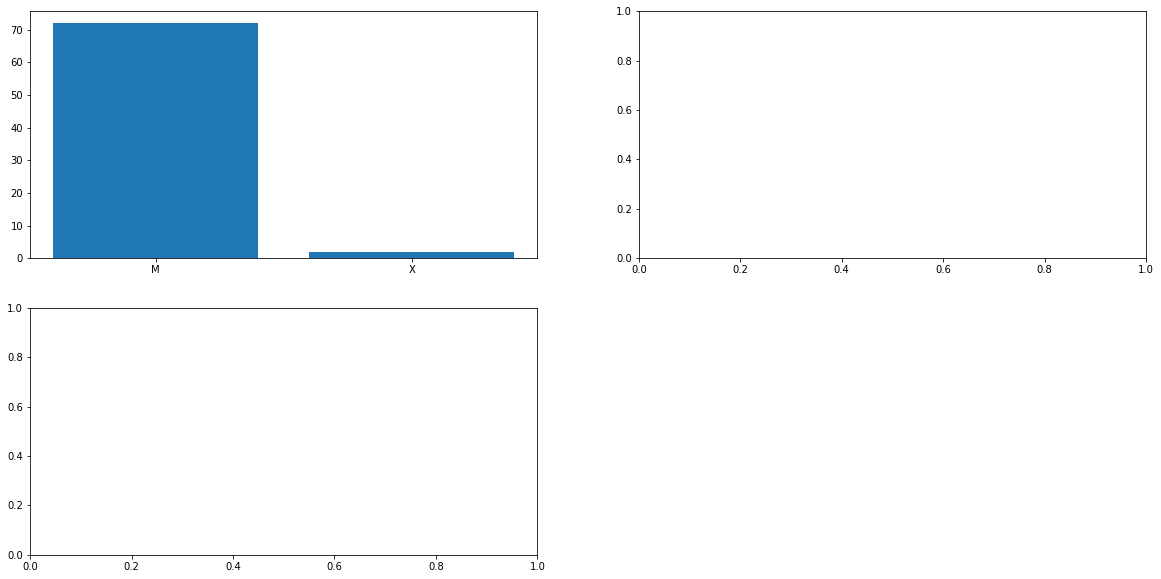

In [284]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 =  fig.add_subplot(223)

ax_data_raw = hashed_df.goes_letter.value_counts()

ax_x_val = ax_data_raw.keys()
ax_y_val = ax_data_raw.values

ax_x_val
ax_y_val
ax.bar(ax_x_val[1:], ax_y_val[1:])


In [295]:
out_repeat = []

for _, row in hashed_df.iterrows():

    if row['num_repeated'] == 2:

        # only keep 1 of the rows for this entry

        masked_df = ss_flares[ss_flares.peak_time == row['peak_time']]

        if row['hash_key'] == np.str('[]'):

            print(masked_df.id_team.unique())
            
    else:
        pass

['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['SolarSoft']
['Sola

In [264]:
# test_time = ss_flares[ss_flares.duplicated(subset='peak_time')].iloc[392].peak_time

# compare_df = ss_flares[ss_flares.peak_time == test_time].iloc[1].compare(ss_flares[ss_flares.peak_time == test_time].iloc[0]).reset_index()

#lets drop all with same peaktime and no difference.
repeated_hek_flares_out_list = []
repeated_hek_flares_out_check = []
hash_list = []
for repeated_peaktime in ss_flares[ss_flares.duplicated(subset='peak_time')].peak_time:

    masked_df = ss_flares[ss_flares.peak_time == repeated_peaktime]

    if len(masked_df) == 2:

        compare_df = masked_df.iloc[1].compare(masked_df.iloc[0]).reset_index().rename(columns={'index':'metadata'})

        # hashlib.sha256(url.encode('utf-8')).hexdigest()

        compare_df['hash_meta'] = [hashlib.sha256(np.str(compare_df.metadata.to_list()).encode('utf-8')).hexdigest() for _ in compare_df.metadata]

        # print([hashlib.sha256(np.str(compare_df.metadata.to_list()).encode('utf-8')).hexdigest() for _ in compare_df.metadata][0])

        # print(compare_df.iloc[0].hash_meta)

        if len(compare_df) == 0:

            this_hash = hashlib.sha256(np.str([]).encode('utf-8')).hexdigest()
        else:
            this_hash = compare_df.hash_meta.iloc[0]

        # repeated_hek_flares_out_check.append(compare_df)

        if this_hash == '4f53cda18c2baa0c0354bb5f9a3ecbe5ed12ab4d8e11ba873c2f11161202b945':

            repeated_hek_flares_out_list.append(masked_df.iloc[0])

            # print(masked_df.telescope_used.unique())

        
        if this_hash not in hash_list:

            print(this_hash)
            hash_list.append(this_hash)

            repeated_hek_flares_out_check.append({'repeated_peaktime': repeated_peaktime, 'metadata': compare_df.metadata.to_list(), 'hash_meta':this_hash })



            # print(np.sum([this_hash == '4f53cda18c2baa0c0354bb5f9a3ecbe5ed12ab4d8e11ba873c2f11161202b945' for this_hash in compare_df.hash_meta]))

    #         # if compare_df.hash_meta.iloc[0] == '4f53cda18c2baa0c0354bb5f9a3ecbe5ed12ab4d8e11ba873c2f11161202b945': # hash for there is no difference 

    #         #     repeated_hek_flares_out_list.append(masked_df.iloc[0].to_dict('records'))
    #         # else:
    #         #     pass
    #             # repeated_hek_flares_out_list.append(masked_df.to_dict('records'))
    #     except:
    #         print(compare_df)





f30283a1f9aa41b43aabfb7190d0f7254619779370f37884a1d85ed105cc0f6e
415b9775d26cf784c6f87301b3c8ac057d315b987ba590c50c3fb1d078f52347
ef11d90362766a3ae8d8c76ef6f9cdbafceb34f1c79645b4d945c5214ba5d057
0b77b9f9392820db71cf8af85410ee43a11ffbcb1682ad0aee322604688eee34
199009e8dd35a81cb00d7c6359657831a0f722d1e8b062d116df5aa890864fcb
cfaa76a24fb115639e79e8bad99390bff82dd7689ca3d6d338ef17711aaa6f7e
aa674e4c5a0a023eeaa688a8fc14ee8c68d37a439efe4e8934e148851edf09f8
5181b1fa1f65eb45774403b89fa6936d1c4a173d0270ac73fea7c8f03faaa2a4
4f53cda18c2baa0c0354bb5f9a3ecbe5ed12ab4d8e11ba873c2f11161202b945
3fb25fb1a0d1c85d64cbbad577e64f48b6398f423e6ea7eaf939eb05169a0573
cd210dd7a1e47bbcf81ced912d7fc1d404598e9d2eef2d854c58c43d48fb2354
ea7dd96a84410906e1d3440cabfca6ac7d9adcc754380a220f81ab1a1570efdc
1a85fe23b738d404dbdd50c114d9975c6933707a0d64ed570e30fa18cc2ee28b
f4aed33665888b5f7f7640b177ebc9ec292108678f7f04de06e47fbe384555c5
ff010fad5769af15e848dc0f70082dfad204d703047bc51e966f0c6b153e49ea
bd54c5562f1616558c422ef3c

In [237]:
len(hash_list)

72

In [239]:
pd.DataFrame(repeated_hek_flares_out_list).id_team.value_counts()

SolarSoft    163
Name: id_team, dtype: int64

In [217]:
compare_df = masked_df.iloc[1].compare(masked_df.iloc[0]).reset_index().rename(columns={'index':'metadata'})
compare_df

,metadata,self,other


In [218]:
[hashlib.sha256(np.str(compare_df.metadata.to_list()).encode('utf-8')).hexdigest() for _ in compare_df.metadata]

[]

In [210]:
solar_soft_repeated_meta_data = pd.DataFrame(repeated_hek_flares_out_list)

,metadata,self,other,hash_meta
0,end_time,2010-06-12 04:06:00+00:00,2010-06-12 04:17:00+00:00,f30283a1f9aa41b43aabfb7190d0f7254619779370f378...
1,AR_num,1077.0,1081.0,f30283a1f9aa41b43aabfb7190d0f7254619779370f378...


In [200]:
np.str(compare_df.metadata.to_list())

"['start_time', 'end_time', 'hgc_x', 'hgc_bbox_poly', 'hpc_x', 'hpc_y', 'hpc_bbox_poly']"

In [211]:
solar_soft_repeated_meta_data = pd.DataFrame(repeated_hek_flares_out_list)

solar_soft_repeated_meta_data

""


In [184]:
solar_soft_repeated_meta_data

,repeated_peaktime,metadata,hash_meta
0,2010-06-12 04:06:00+00:00,"[end_time, AR_num]",f30283a1f9aa41b43aabfb7190d0f7254619779370f378...
1,2010-06-13 05:39:00+00:00,"[end_time, hpc_x, hpc_y, hpc_bbox_poly]",415b9775d26cf784c6f87301b3c8ac057d315b987ba590...
2,2010-08-07 18:24:00+00:00,"[start_time, end_time, hgc_x, hgc_bbox_poly, h...",ef11d90362766a3ae8d8c76ef6f9cdbafceb34f1c79645...
3,2010-09-21 07:53:00+00:00,"[start_time, end_time, hgc_x, hgc_bbox_poly, h...",ef11d90362766a3ae8d8c76ef6f9cdbafceb34f1c79645...
4,2010-10-19 10:14:00+00:00,"[start_time, end_time, goes_class, goes_number...",0b77b9f9392820db71cf8af85410ee43a11ffbcb1682ad...
...,...,...,...
651,2020-05-29 10:46:00+00:00,"[hgs_y, hgc_y, hpc_x, hpc_y]",875aece2da36323e3901832488d3adbf7c2a2662b02851...
652,2020-08-15 06:47:00+00:00,"[end_time, AR_num, hgs_x, hgs_y, hgc_x, hgc_y,...",75e05882239ef625e03225d9e88cc1aa12ff84d00a5011...
653,2020-11-05 23:56:00+00:00,"[hgs_x, hgc_x, hpc_x, hpc_y]",5ab6839228a6ffd9b1d63095a18e9c3c7aabe62b14303b...
654,2020-11-26 21:23:00+00:00,"[start_time, end_time, goes_class, goes_number...",1a85fe23b738d404dbdd50c114d9975c6933707a0d64ed...


In [183]:
keys, values = solar_soft_repeated_meta_data.hash_meta.value_counts().keys(),solar_soft_repeated_meta_data.hash_meta.value_counts().values



73

In [178]:
compare_df
# compare_df.reset_index()


,metadata,self,other
0,start_time,2020-11-29 00:59:00+00:00,2020-11-29 00:50:00+00:00
1,end_time,2020-11-29 02:43:00+00:00,2020-11-29 01:48:00+00:00
2,hgc_x,-20.60839,-20.52602
3,hgc_bbox_poly,"[[-4.60839, 1.0], [-4.60839, 1.0], [-4.60839, ...","[[-4.52602, 1.0], [-4.52602, 1.0], [-4.52602, ..."
4,hpc_x,-240.351006,-240.350736
5,hpc_y,-318.970812,-318.982734
6,hpc_bbox_poly,"[[17.045602, -1.780233], [17.045602, -1.780233...","[[17.045583, -1.793688], [17.045583, -1.793688..."


In [141]:
# compare_df = ss_flares[ss_flares.peak_time == out_date].iloc[1].compare(ss_flares[ss_flares.peak_time == out_date].iloc[0])
# compare_df

,self,other
hpc_x,938.38536,938.388
hpc_y,250.932066,250.932
hpc_bbox_poly,"[[17.033218, -9.882706], [17.033218, -9.882706...","[[17.03322, -9.88278], [17.03322, -9.88278], [..."


In [135]:
g_flares = hek_flares[(hek_flares.id_team =='SWPC') & (hek_flares.goes_letter >= 'C')]
g_flares.goes_letter.value_counts()

C    7603
M     724
X      49
Name: goes_letter, dtype: int64

In [78]:
g_flares[g_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

C    18
M     5
Name: goes_letter, dtype: int64

In [77]:
g_flares[g_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

test_time2 = g_flares[g_flares.duplicated(subset='peak_time')].iloc[2].peak_time

g_flares[g_flares.peak_time == test_time2].iloc[1].compare(g_flares[g_flares.peak_time == test_time2].iloc[0])

,self,other
start_time,2012-09-29 07:50:00+00:00,2012-09-29 06:17:00+00:00
end_time,2012-09-29 07:56:00+00:00,2012-09-29 07:59:00+00:00
AR_num,11577.0,11575.0
hgs_x,66.0,45.0
hgs_y,9.0,6.0
hgs_bbox_poly,"[[65.5, 8.5], [66.5, 8.5], [66.5, 9.5], [65.5,...","[[44.5, 5.5], [45.5, 5.5], [45.5, 6.5], [44.5,..."
hgc_x,-172.09776,167.7545
hgc_y,9.0,6.0
hgc_bbox_poly,"[[-172.59776, 8.5], [-171.59776, 8.5], [-171.5...","[[167.2545, 5.5], [168.2545, 5.5], [168.2545, ..."
hpc_x,865.566,675.516


In [ ]:
ss_flares = hek_flares[(hek_flares.id_team =='SolarSoft') & (hek_flares.goes_letter >= 'C')]
ss_flares.goes_letter.value_counts()

In [8]:
flare_class_dict_query = {'A': 1e-8, 'B': 1e-7, 'C': 1e-6, 'M': 1e-5, 'X': 1e-4}
teams = {'ALEXIS': 1, 'SWPC': 2, 'SolarSoft':4}  
# tuples are (ALEXIS, SWPC, solar_soft)    
id_dict = {'7':(1,1,1), '6': (0,1,1), '5': (1,0,1),'4': (0,0,1),'3': (1,1,0),'2': (0,1,0),'1': (1,0,0)}

In [9]:
goes_flares = hek_flares[(hek_flares['id_team'] == 'SWPC')& (hek_flares['goes_class'] > 'C')].reset_index(drop= True)

solarsoft_flares = hek_flares[(hek_flares['id_team'] == 'SolarSoft') & (hek_flares['goes_class'] > 'C')].reset_index(drop= True)

zero_cross = merged_zerocross_df[(merged_zerocross_df['resampled_value'] > flare_class_dict_query['C'])].reset_index(drop= True)


In [22]:
solarsoft_flares

,peak_time,id_team
0,2010-05-01 01:39:00+00:00,SolarSoft
1,2010-05-04 16:29:00+00:00,SolarSoft
2,2010-05-05 07:16:00+00:00,SolarSoft
3,2010-05-05 11:52:00+00:00,SolarSoft
4,2010-05-05 17:19:00+00:00,SolarSoft
...,...,...
9033,2020-11-28 23:18:00+00:00,SolarSoft
9034,2020-11-29 01:16:00+00:00,SolarSoft
9035,2020-11-29 01:16:00+00:00,SolarSoft
9036,2020-11-29 11:44:00+00:00,SolarSoft


In [10]:
#define our zero crossing df

our_flares = zero_cross[['zerocross_date_time']]

our_flares['id_team'] = 'ALEXIS'

only_duplicated_zero = our_flares[(our_flares.duplicated())]

zero_flares = our_flares.rename(columns = {'zerocross_date_time': 'peak_time'})

<ipython-input-10-531287107d90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_flares['id_team'] = 'ALEXIS'


In [11]:

# define SWPC Flares

goes_flares = pd.DataFrame(goes_flares.peak_time, columns = ['peak_time'])

goes_flares['id_team'] = 'SWPC'

In [12]:
# define solarsoft flares

solarsoft_flares = pd.DataFrame(solarsoft_flares.peak_time, columns = ['peak_time'])

solarsoft_flares['id_team'] = 'SolarSoft'


In [13]:
all_flares_not_masked = pd.concat([zero_flares , goes_flares,  solarsoft_flares], ignore_index=True)

date_limit_low, date_limit_high = pd.Timestamp('2010/5/1T00:00:00', tz = 'utc'),pd.Timestamp('2020/3/4T00:00:00', tz = 'utc')

all_flares = all_flares_not_masked[(all_flares_not_masked.peak_time >= date_limit_low) & (all_flares_not_masked.peak_time <= date_limit_high)].sort_values(by = 'peak_time').reset_index(drop = True)

In [14]:
minutes_per_agg = 10

j = 0 # grab first datetime in the list
flares_list = [] # keep track of info from loop

while j < len(all_flares.peak_time):
    
    datetime = all_flares.peak_time.iloc[j] # grab j-th datetime
        
    fwd = datetime + timedelta(minutes = minutes_per_agg) # choose fwd time range
     
    mask = all_flares[(all_flares.peak_time < fwd) & (all_flares.peak_time >= datetime)] # return df with all entries from current datetime to fwd time
    
    this_flare_datetime_list = []
    
    this_flare_identification = []
    
    for group in teams: 
        
        group_mask = mask[(mask.id_team) == group] #filter for all elements of mask that are returned by each individual group
        
        number_of_entries = len(group_mask)
        
        if number_of_entries != 0:
        
            mean_datetime = np.mean(group_mask.peak_time)
            
            this_flare_datetime_list.append({'datetime': mean_datetime})
            
            this_flare_identification.append(teams[group])
                   
        
    sum_of_ids = np.sum(this_flare_identification)
    
    flare_id_tuple = id_dict[str(sum_of_ids)]
    
    datetime_df = pd.DataFrame(this_flare_datetime_list)
    
    merged_datetime = np.mean(datetime_df.datetime)
            
    flares_list.append({'merged_datetime': merged_datetime,
                        'id_tuple': flare_id_tuple})
    
    k = len(mask) # go k amount fwd in the list of datetimes

    j = j + k

In [15]:
flare_list_df = pd.DataFrame(flares_list)
flare_list_df

,merged_datetime,id_tuple
0,2010-05-01 01:39:00.046000128+00:00,"(1, 1, 1)"
1,2010-05-04 16:29:20.046000128+00:00,"(1, 1, 1)"
2,2010-05-05 07:15:40.046000128+00:00,"(1, 1, 1)"
3,2010-05-05 11:52:40.046000128+00:00,"(1, 1, 1)"
4,2010-05-05 17:19:40.046000128+00:00,"(1, 1, 1)"
...,...,...
38662,2019-05-07 10:47:39.833166592+00:00,"(1, 1, 1)"
38663,2019-05-07 11:26:59.499500032+00:00,"(1, 0, 0)"
38664,2019-05-07 11:56:19.833166592+00:00,"(1, 1, 1)"
38665,2019-05-09 05:50:59.833166592+00:00,"(1, 1, 1)"


In [16]:
plot_this = []
for name,group in pd.DataFrame(flares_list).groupby('id_tuple'):
    
    plot_this.append({'id_tuple': name, 
                     'counts': len(group)})

In [17]:
stat_df = pd.DataFrame(plot_this)

stat_df


,id_tuple,counts
0,"(0, 0, 1)",60
1,"(0, 1, 0)",36
2,"(0, 1, 1)",268
3,"(1, 0, 0)",29982
4,"(1, 0, 1)",378
5,"(1, 1, 0)",555
6,"(1, 1, 1)",7388


In [21]:
np.sum(stat_df.counts) - np.sum([55,57,248,30028,337,1788,6153])

1

38666

-0.4
0.6
1.6
2.6
3.6
4.6
5.6


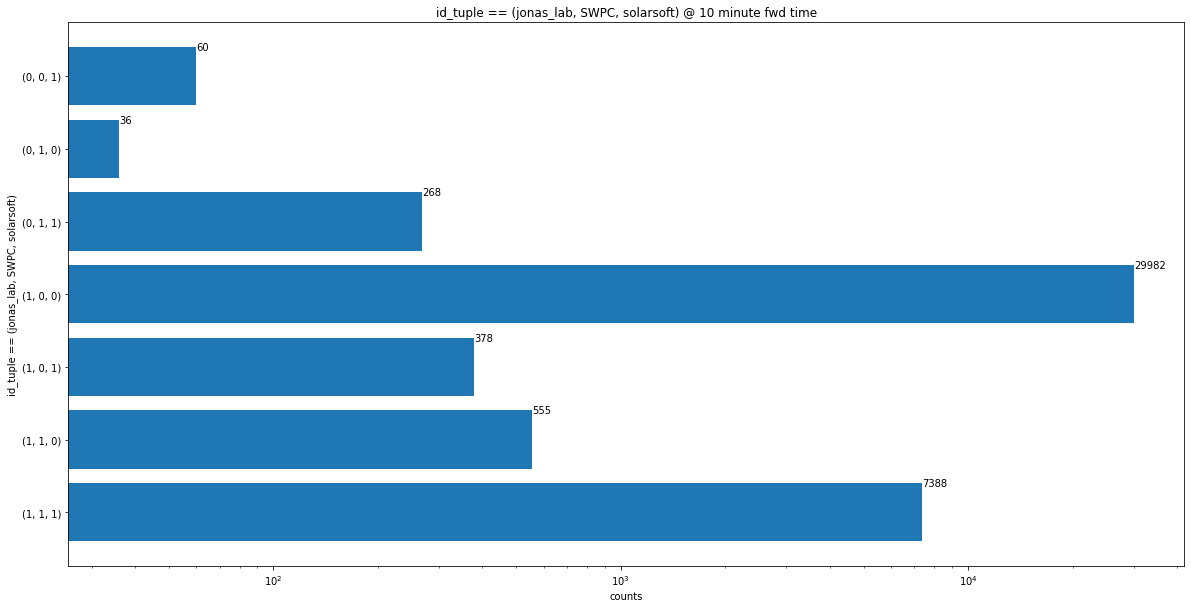

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)


# Example data
id_tuple = stat_df.id_tuple.to_list()
y_pos = np.arange(len(id_tuple))
counts = stat_df.counts.to_list()
# error = np.random.rand(len(people))



hbars = ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(id_tuple)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('counts')
ax.set_ylabel('id_tuple == (jonas_lab, SWPC, solarsoft)')
ax.set_title('id_tuple == (jonas_lab, SWPC, solarsoft) @ {} minute fwd time'.format(minutes_per_agg))

for bar in hbars:
    print(bar.get_y())
    ax.text(bar.get_width(), bar.get_y(), s = bar.get_width(), va = 'center')

ax.set_xscale('log')